In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


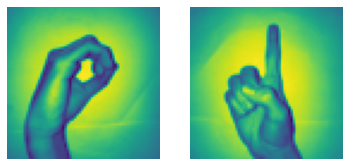

In [2]:
x_l = np.load('/kaggle/input/sign-language-digits-dataset/X.npy')
Y_l = np.load('/kaggle/input/sign-language-digits-dataset/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')
plt.show()

In [3]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [4]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [6]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [7]:
# initialize w and b
def initialize_w_and_b(dimension):
    w=np.full(shape=(dimension,1), fill_value=0.01)
    b=0.0
    return w,b

def sigmoid(z):
    return 1/(1+np.exp(-z))


In [8]:
#forward and backward propagation
def forward_and_backward_propagation(x_train,y_train,w,b):
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=np.sum(loss)/x_train.shape[1]
    
    derivative_w=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_b=np.sum(y_head-y_train)/x_train.shape[1]
    
    return cost,derivative_w,derivative_b
    

In [9]:
# update parameters
def update(x_train,y_train,w,b,learning_rate,number_of_iterations):
    cost_list=[]
    cost_list2=[]
    index=[]
    
    for i in range(number_of_iterations):
        cost,derivative_w,derivative_b = forward_and_backward_propagation(x_train,y_train,w,b)
        cost_list.append(cost)
        w = w-learning_rate*derivative_w
        b = b-learning_rate*derivative_b
        
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration {}: {}'.format(i,cost))

    # draw
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.show()
    
    return w,b

In [10]:
# logistic regression
def logistic_regression(x_train,x_test,y_train,y_test,learning_rate,number_of_iterations):
    
    w,b = initialize_w_and_b(x_train.shape[0])
    
    w,b = update(x_train,y_train,w,b,learning_rate,number_of_iterations)
    
    Y_head = sigmoid(np.dot(w.T,x_test) + b)
    
    Y_predicted = np.array([0 if each<=0.5 else 1 for each in Y_head[0]])
        
    print('Accuracy: ',100-np.mean(np.abs(Y_predicted - y_test))*100)
    
    return Y_predicted
    

Cost after iteration 0: 14.014222401929988
Cost after iteration 10: 4.145042432940109
Cost after iteration 20: 2.452003319279265
Cost after iteration 30: 1.9165125877225757
Cost after iteration 40: 2.01987781589545
Cost after iteration 50: 2.1616734625411915
Cost after iteration 60: 2.31024942888315
Cost after iteration 70: 2.3806597152060127
Cost after iteration 80: 2.2446088829753044
Cost after iteration 90: 1.9263484917565667
Cost after iteration 100: 1.2552839623971113
Cost after iteration 110: 0.28215410723754014
Cost after iteration 120: 0.1946033387463126
Cost after iteration 130: 0.18363329759838137
Cost after iteration 140: 0.17389877636739615


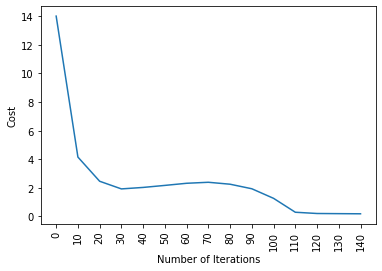

Accuracy:  95.16129032258064


In [11]:
Y_predicted = logistic_regression(x_train,x_test,y_train,y_test,0.02,150)